In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For train-test split, scaling, and encoding
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [36]:
# Load the dataset
data = pd.read_csv("C:\\Users\\bhara\\Downloads\\Leads.csv")

# Preview the dataset
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [37]:
# Checking for missing values
missing_values = data.isnull().sum()
# print(missing_values[missing_values > 0])
missing_values[missing_values > 0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [38]:
# Check if 'Lead Source' exists in the dataset
print('Lead Source' in data.columns)

# Display all columns
print(data.columns)

True
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


Overall Conversion Rate: 38.54%


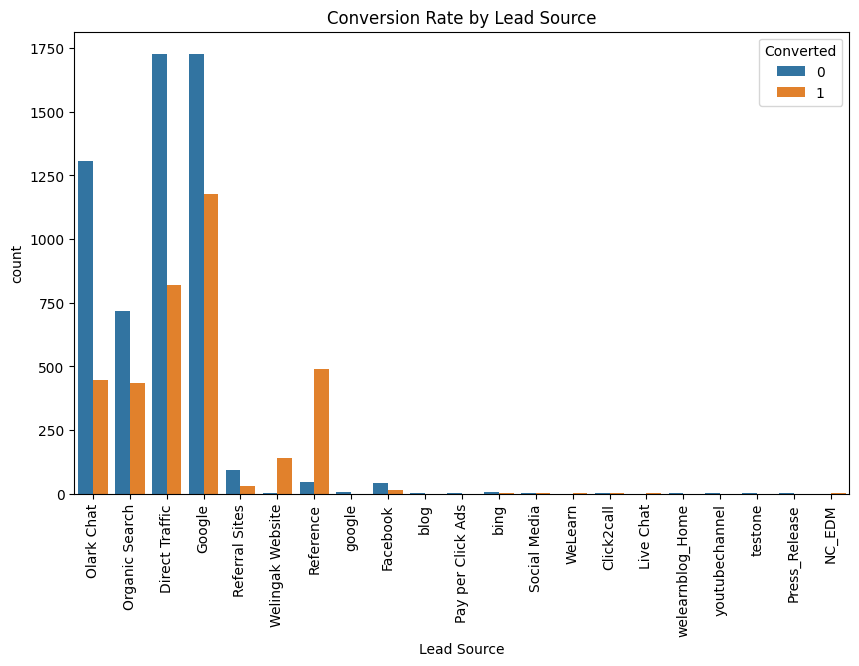

In [48]:
# Conversion rate
conversion_rate = data['Converted'].mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

# Conversion rate by Lead Source
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Lead Source', hue='Converted')
plt.title('Conversion Rate by Lead Source')
plt.xticks(rotation=90)
plt.show()

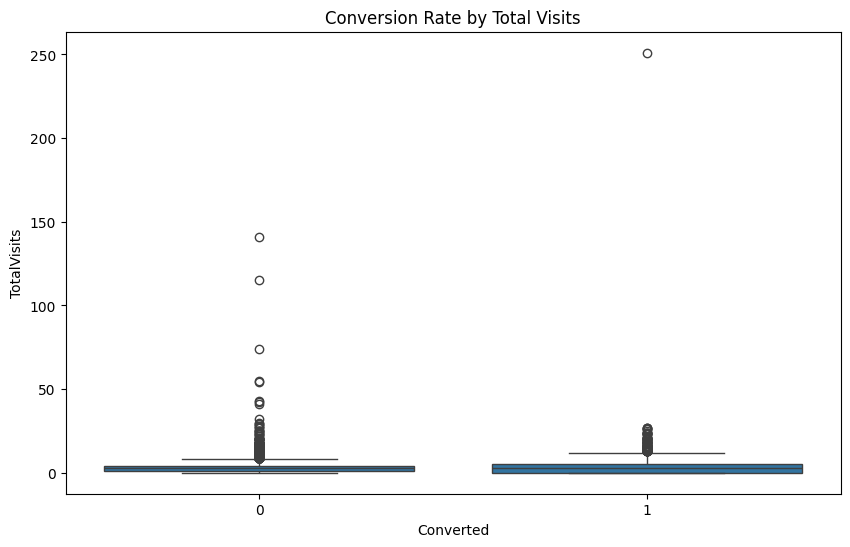

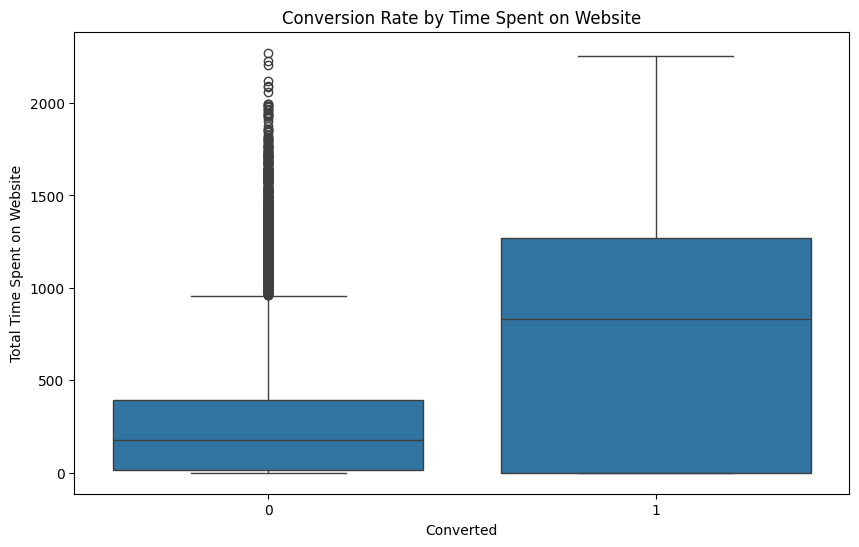

In [49]:
# Conversion rate based on total visits
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Converted', y='TotalVisits')
plt.title('Conversion Rate by Total Visits')
plt.show()

# Conversion rate based on time spent on the website
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Converted', y='Total Time Spent on Website')
plt.title('Conversion Rate by Time Spent on Website')
plt.show()

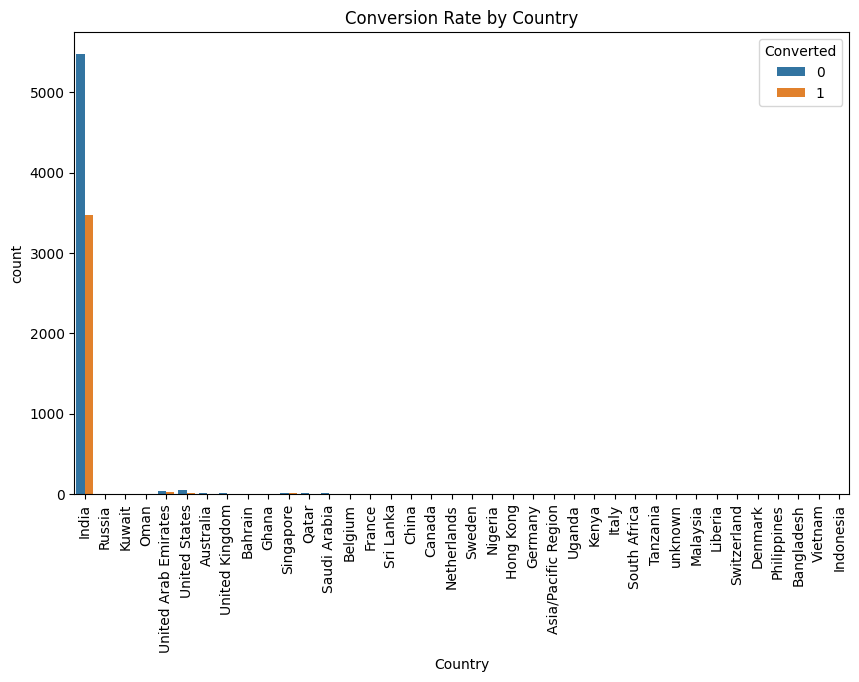

In [50]:
# Conversion rate by country
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Country', hue='Converted')
plt.title('Conversion Rate by Country')
plt.xticks(rotation=90)
plt.show()

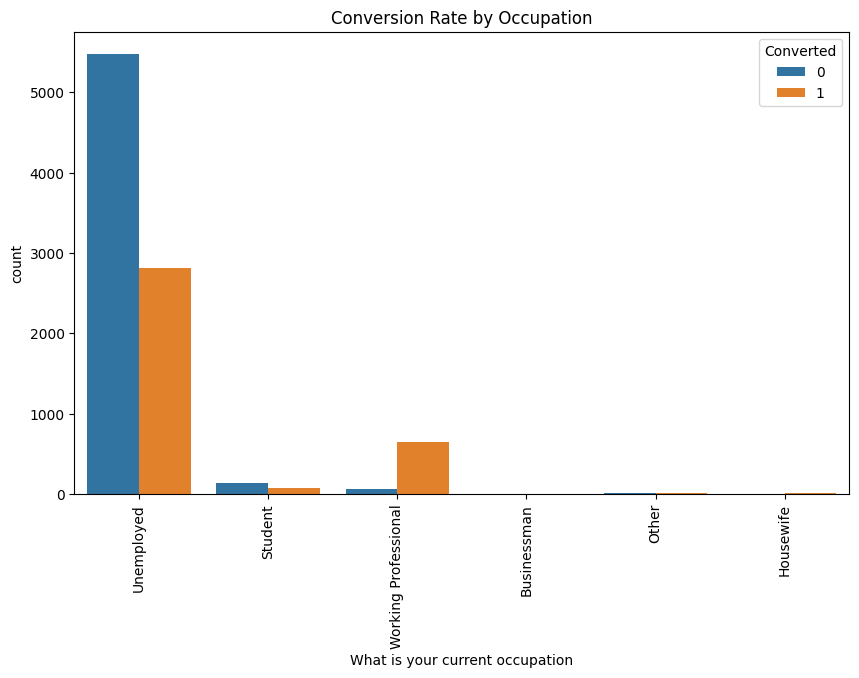

In [51]:
# Conversion rate by occupation
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='What is your current occupation', hue='Converted')
plt.title('Conversion Rate by Occupation')
plt.xticks(rotation=90)
plt.show()

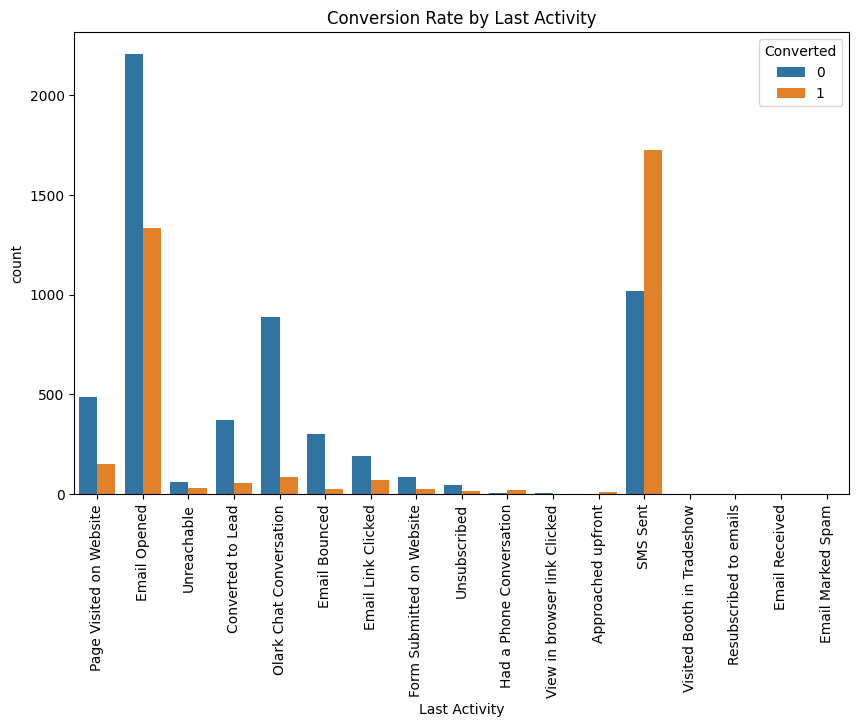

In [52]:
# Conversion rate by last activity
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Last Activity', hue='Converted')
plt.title('Conversion Rate by Last Activity')
plt.xticks(rotation=90)
plt.show()

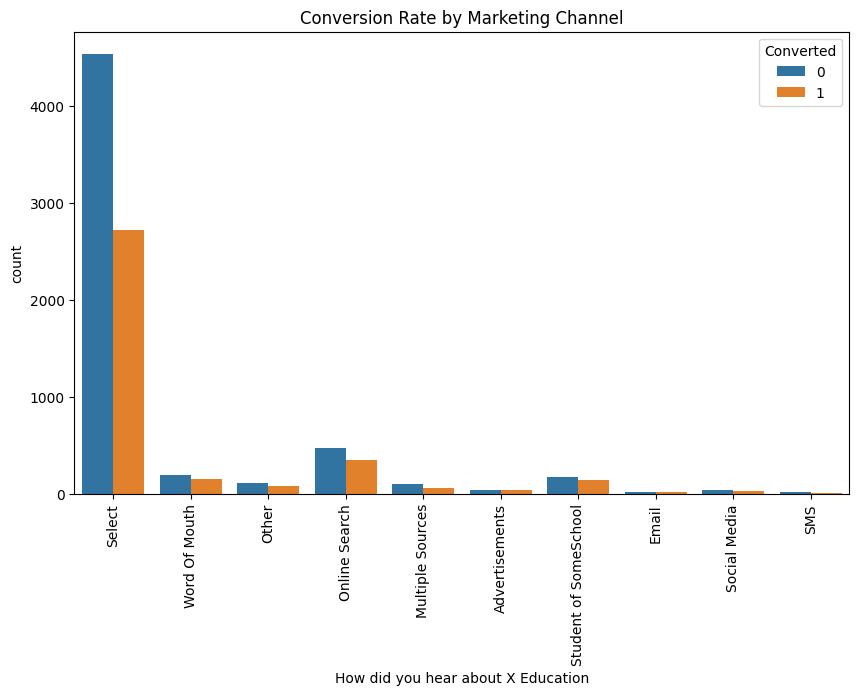

In [53]:
# Conversion rate by "How did you hear about X Education?"
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='How did you hear about X Education', hue='Converted')
plt.title('Conversion Rate by Marketing Channel')
plt.xticks(rotation=90)
plt.show()

Concluding Suggestions:
Which leads are most likely to convert? Leads with higher engagement (more visits, more time spent on the website) and from certain segments (specific occupations or countries) are more likely to convert.
How to prioritize leads? Focus on leads with higher website activity and from high-converting sources. Use a lead scoring system based on engagement metrics.
Tailored marketing strategies: Focus marketing efforts on high-converting segments and allocate more resources to effective channels.
Streamlining the lead management process: Prioritize follow-ups based on activity and engagement timing. Leads that are engaged quickly after activity show higher conversion potential.